<a href="https://colab.research.google.com/github/adityakhuman02/DAA_sem4/blob/main/ADV_EXP1_ADITYA_2021300061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ADITYA KHUMAN
uid 2021300061
###COMPS-A
####Basic - Bar chart, Pie chart, Histogram, Timeline chart, Scatter plot, Bubble plot


Dataset loaded successfully!


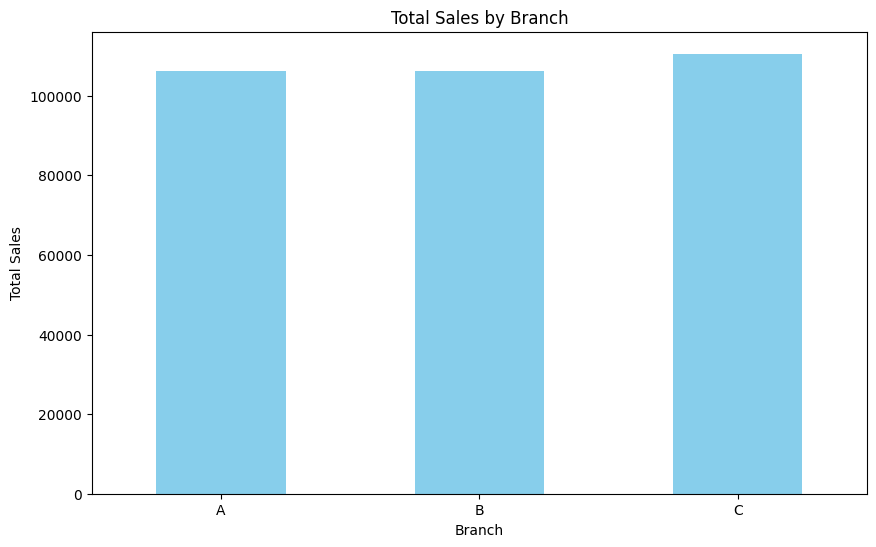

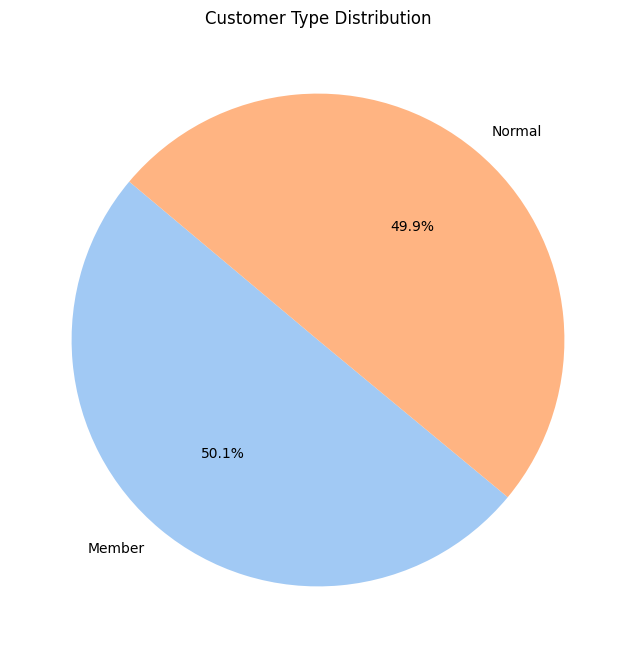

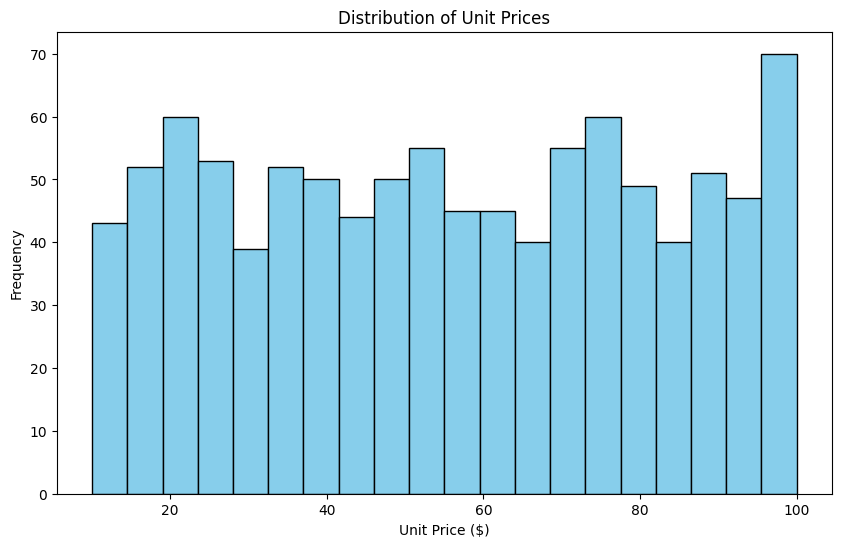

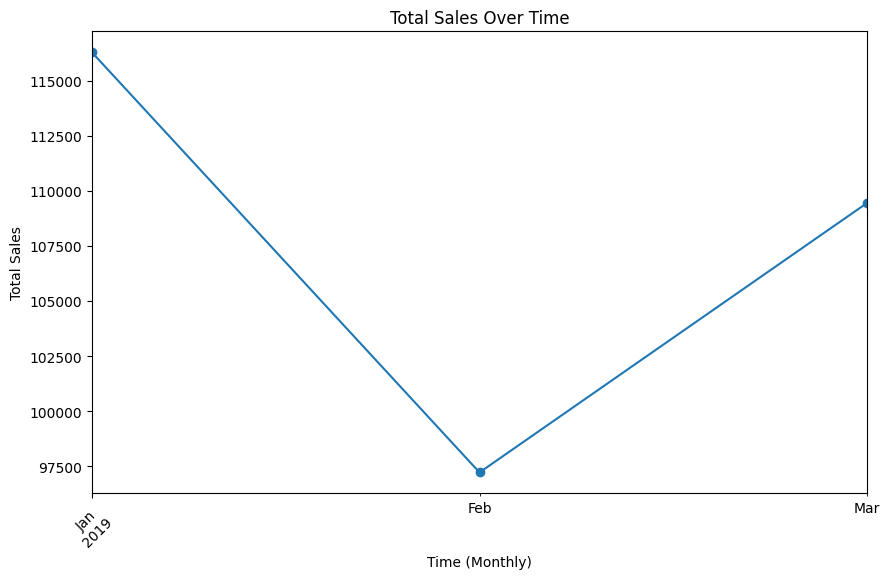

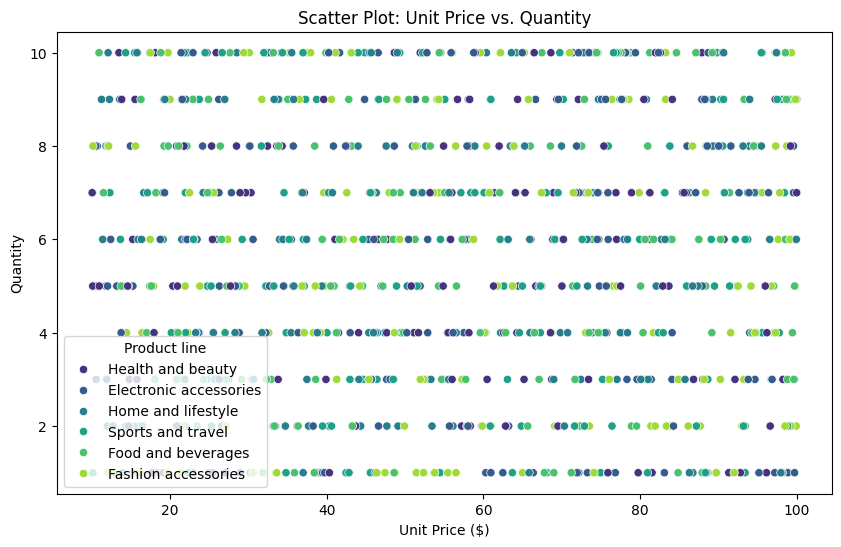

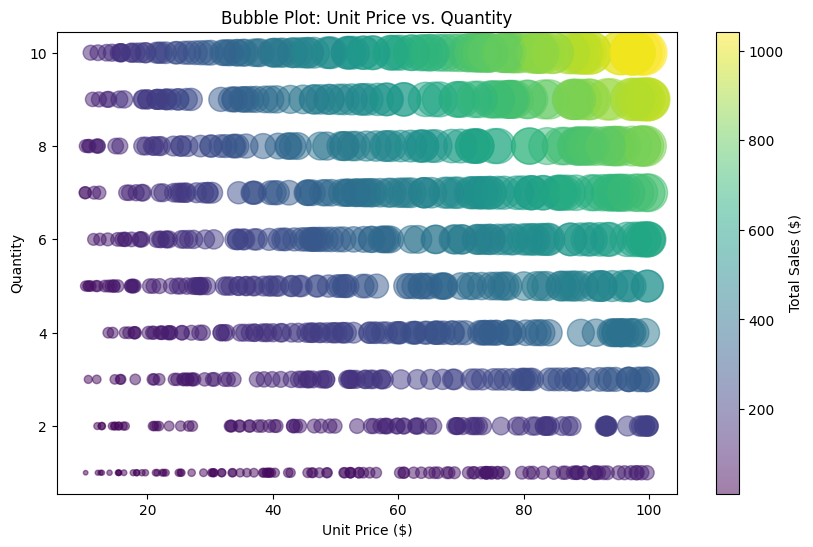

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load dataset
def load_dataset():
    # Prompt user to input the file path
    file_path = "super.csv"
    try:
        # Load the dataset into a pandas DataFrame
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print("The file was not found. Please check the file path and try again.")
    except pd.errors.ParserError:
        print("Error parsing the file. Please ensure it is a valid CSV file.")
    return None

# Function to create various plots
def create_plots(df):
    # Convert the appropriate column to datetime if available
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Adjust column name if different
    else:
        print("Date column not found in dataset. Please check your dataset.")
        return

    # Bar Chart: Total sales by branch
    sales_by_branch = df.groupby('Branch')['Total'].sum()
    plt.figure(figsize=(10, 6))
    sales_by_branch.plot(kind='bar', color='skyblue')
    plt.title('Total Sales by Branch')
    plt.xlabel('Branch')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=0)
    plt.show()

    # Pie Chart: Distribution of customer types
    plt.figure(figsize=(8, 8))
    df['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Customer Type Distribution')
    plt.ylabel('')
    plt.show()

    # Histogram: Distribution of unit prices
    plt.figure(figsize=(10, 6))
    plt.hist(df['Unit price'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Unit Prices')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Frequency')
    plt.show()

    # Timeline Chart: Total sales over time
    if not df['Date'].isnull().all():
        sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()
        sales_over_time.plot(kind='line', marker='o', figsize=(10, 6))
        plt.title('Total Sales Over Time')
        plt.xlabel('Time (Monthly)')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No valid Date data to plot a timeline chart.")

    # Scatter Plot: Unit Price vs. Quantity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Unit price', y='Quantity', data=df, hue='Product line', palette='viridis')
    plt.title('Scatter Plot: Unit Price vs. Quantity')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Quantity')
    plt.show()

    # Bubble Plot: Unit Price vs. Quantity with bubble size based on Total
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Unit price'], df['Quantity'], s=df['Total'], alpha=0.5, c=df['Total'], cmap='viridis')
    plt.title('Bubble Plot: Unit Price vs. Quantity')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Quantity')
    plt.colorbar(label='Total Sales ($)')
    plt.show()

# Main function
def main():
    df = load_dataset()
    if df is not None:
        create_plots(df)

# Entry point of the script
if __name__ == "__main__":
    main()
